In [19]:
%pylab inline
%matplotlib inline
n=36
m=10
J=48
root='../'#''../../Spherical Shell Data/'

Populating the interactive namespace from numpy and matplotlib


In [64]:
weights_file = root+'weight_files/jackknife_weights_n%d_m%d_j%d.dat'%(n,m,J)
RR_file=root+'weight_files/binned_pair_counts_n%d_m%d_j%d.dat'%(n,m,J)
EE1_file = root+'CovMatricesAll/EE1_n%d_m%d_full.txt' %(n,m)
RR1_file = root+'CovMatricesAll/RR1_n%d_m%d_full.txt' %(n,m)
EE2_file = root+'CovMatricesAll/EE2_n%d_m%d_full.txt' %(n,m)
RR2_file = root+'CovMatricesAll/RR2_n%d_m%d_full.txt' %(n,m)
Cx_file = root+'CovMatricesJack/cxj_n%d_m%d_full.txt' %(n,m)
C2_file = root+'CovMatricesJack/c2j_n%d_m%d_full.txt' %(n,m)
C3_file = root+'CovMatricesJack/c3j_n%d_m%d_full.txt' %(n,m)
C4_file = root+'CovMatricesJack/c4j_n%d_m%d_full.txt' %(n,m)
cxj=np.loadtxt(Cx_file)

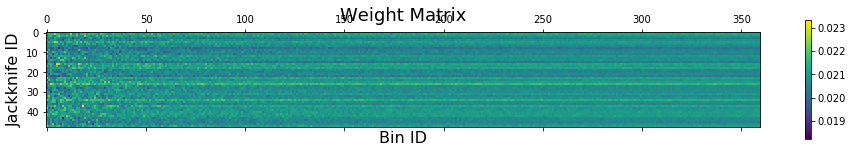

In [36]:
weights=np.loadtxt(weights_file)[:,1:]
plt.matshow(weights);FS=16;
plt.ylabel('Jackknife ID',fontsize=FS)
plt.xlabel('Bin ID',fontsize=FS)
plt.colorbar()
plt.title('Weight Matrix',fontsize=FS+2);

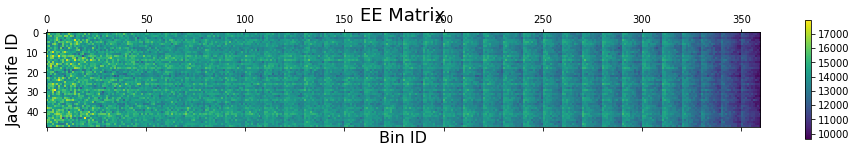

<Figure size 432x288 with 0 Axes>

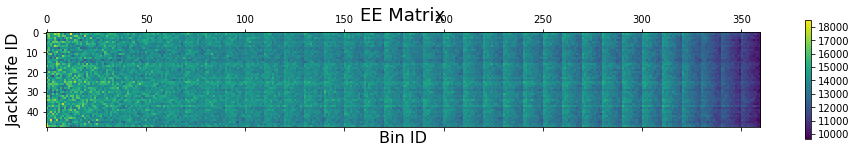

In [37]:
EEaA1=np.loadtxt(EE1_file)
EEaA2=np.loadtxt(EE2_file)
RRaA1=np.loadtxt(RR1_file)
RRaA2=np.loadtxt(RR2_file)
plt.matshow(EEaA1);FS=16;
plt.ylabel('Jackknife ID',fontsize=FS)
plt.xlabel('Bin ID',fontsize=FS)
plt.colorbar()
plt.title('EE Matrix',fontsize=FS+2);
plt.figure()
plt.matshow(EEaA2);FS=16;
plt.ylabel('Jackknife ID',fontsize=FS)
plt.xlabel('Bin ID',fontsize=FS)
plt.colorbar()
plt.title('EE Matrix',fontsize=FS+2);

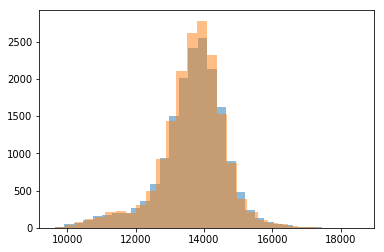

In [38]:
plt.hist(EEaA1.ravel(),alpha=0.5,bins=30)
plt.hist(EEaA2.ravel(),alpha=0.5,bins=30);

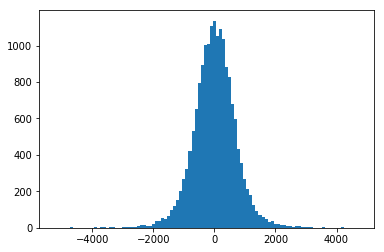

In [39]:
plt.hist(EEaA1.ravel()-EEaA2.ravel(),bins=100);

In [46]:
EEa1=np.sum(EEaA1,axis=0)
EEa2=np.sum(EEaA2,axis=0)
RRa1=np.sum(RRaA1,axis=0)
RRa2=np.sum(RRaA2,axis=0)

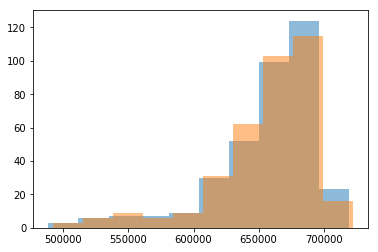

In [47]:
plt.hist(EEa1,alpha=0.5);
plt.hist(EEa2,alpha=0.5);

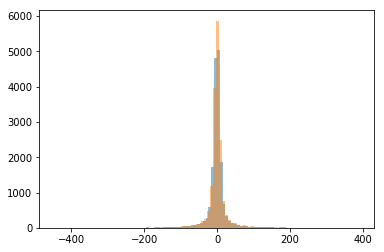

In [49]:
d1=EEaA1-RRaA1/RRa1*EEa1
d2=EEaA2-RRaA2/RRa2*EEa2
plt.hist(d1.ravel(),alpha=0.5,bins=100)
plt.hist(d2.ravel(),alpha=0.5,bins=100);

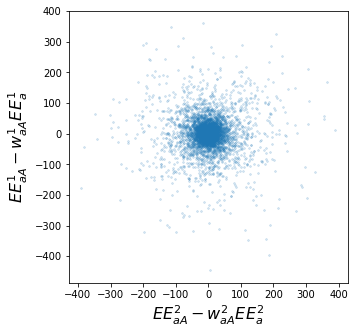

In [53]:
fig=plt.figure(figsize=(5,5))
plt.scatter(d1.ravel(),d2.ravel(),marker='x',alpha=0.2,s=3)
plt.ylabel(r'$EE_{aA}^1-w^1_{aA}EE_a^1$',fontsize=FS);plt.xlabel(r'$EE_{aA}^2-w^2_{aA}EE_a^2$',fontsize=FS);

In [54]:
from scipy.stats.stats import pearsonr
pmcc=pearsonr(d1.ravel(),d2.ravel())
print("Pearson R: %.2f, probability of randomness: %.1e" %(pmcc[0],pmcc[1]))

Pearson R: 0.00, probability of randomness: 8.7e-01


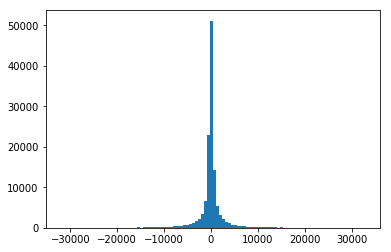

In [55]:
dd=np.matmul(d1.T,d2)
plt.hist(dd.ravel(),bins=100,range=np.percentile(dd,[0.4,99.6]));

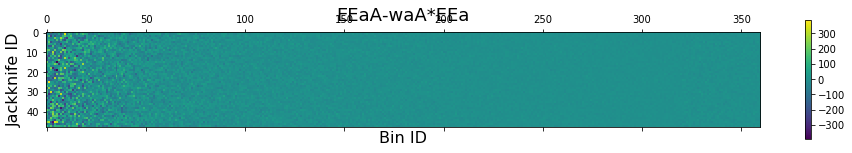

In [65]:
diffaA1=EEaA1-RRaA1/RRa1*EEa1
diffaA2=EEaA2-RRaA2/RRa2*EEa2
plt.matshow(diffaA1);FS=16;
plt.ylabel('Jackknife ID',fontsize=FS)
plt.xlabel('Bin ID',fontsize=FS)
plt.colorbar()
plt.title('EEaA-waA*EEa',fontsize=FS+2);

In [66]:
RRa = np.loadtxt(RR_file)
RRaRRb=np.matmul(np.asmatrix(RRa).T,np.asmatrix(RRa))
fact=np.matmul(np.asmatrix(weights).T,np.asmatrix(weights))

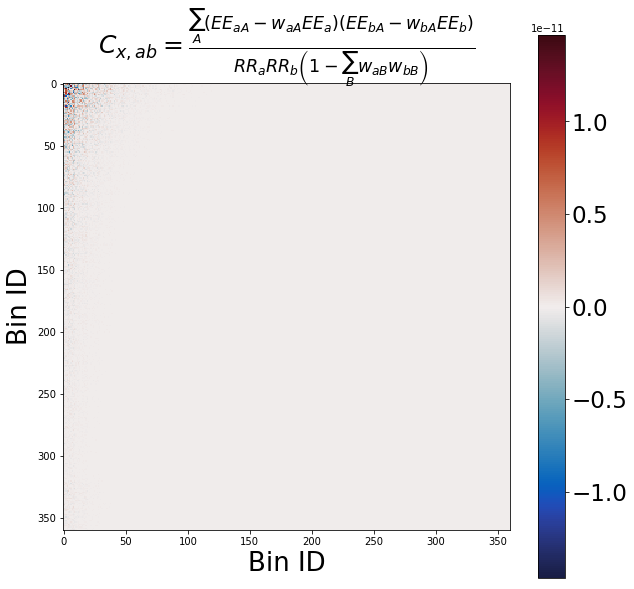

In [67]:
diff_mat=np.asarray(np.matmul(diffaA1.T,diffaA2)/np.matmul(fact,RRaRRb))
import cmocean
fig,ax=plt.subplots(1,figsize=(10,10))
vmax=max(diff_mat.ravel())
cax=ax.matshow(diff_mat,cmap=cmocean.cm.balance,vmax=vmax,vmin=-vmax);FS=26;
plt.gca().xaxis.tick_bottom()
ax.set_ylabel('Bin ID',fontsize=FS)
ax.set_xlabel('Bin ID',fontsize=FS)
cbar=fig.colorbar(cax);
cbar.ax.tick_params(labelsize=FS-3)
plt.title(r'$C_{x,ab}=\frac{\sum_A(EE_{aA}-w_{aA}EE_a)(EE_{bA}-w_{bA}EE_b)}{RR_aRR_b\left(1-\sum_B{w_{aB}w_{bB}}\right)}$',fontsize=FS-1);

In [68]:
c_disconn=np.zeros_like(diff_mat)
for a in range(len(c_disconn)):
    for b in range(len(c_disconn)):
        tmp_ab = 0.
        weights_ab = 0.
        for A in range(len(weights)):
            tmp_ab+=(EEaA1[A,a]-RRaA1[A,a]/RRa1[a]*EEa1[a])*(EEaA2[A,b]-RRaA2[A,b]/RRa2[b]*EEa2[b])
            weights_ab+=weights[A,a]*weights[A,b]
        c_disconn[a,b]=tmp_ab/(RRa[a]*RRa[b]*(1.-weights_ab))

In [69]:
c_disconn11=np.zeros_like(diff_mat)
for a in range(len(c_disconn)):
    for b in range(len(c_disconn)):
        tmp_ab = 0.
        weights_ab = 0.
        for A in range(len(weights)):
            tmp_ab+=(EEaA1[A,a]-weights[A,a]*EEa1[a])*(EEaA1[A,b]-weights[A,b]*EEa1[b])
            weights_ab+=weights[A,a]*weights[A,b]
        c_disconn11[a,b]=tmp_ab/(RRa[a]*RRa[b]*(1.-weights_ab))

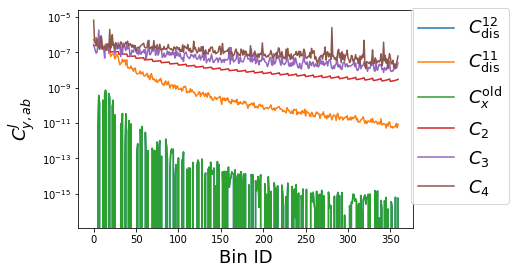

In [76]:
c2j=np.loadtxt(C2_file);FS=18
c3j=np.loadtxt(C3_file);c4j=np.loadtxt(C4_file)
plt.plot(np.diag(c_disconn),label=r'$C_\mathrm{dis}^{12}$')
plt.plot(np.diag(c_disconn11),label=r'$C_\mathrm{dis}^{11}$')
plt.plot(np.diag(cxj),label=r'$C_x^\mathrm{old}$')
plt.plot(c2j,label=r'$C_2$')
plt.plot(np.diag(c3j),label=r'$C_3$')
plt.plot(np.diag(c4j),label=r'$C_4$');
plt.xlabel('Bin ID',fontsize=FS);plt.ylabel(r'$C^J_{y,ab}$',fontsize=FS)
plt.legend(fontsize=FS,loc=9,bbox_to_anchor=(1.14,1.05));
plt.yscale('log')

In [77]:
np.sum(np.sign(c_disconn.ravel()))/len(c_disconn.ravel())

-0.0038271604938271606

Testing:


In [45]:
%pylab inline
n=36;m=10;J=48
diff1s=np.random.uniform(size=[J,n*m])
diff2s=np.random.uniform(size=[J,n*m])
JK_weights=np.random.uniform(size=[J,n*m])
RRs=np.random.uniform(size=[n*m])

Populating the interactive namespace from numpy and matplotlib


In [140]:
# Compute disconnected piece:
cxj = np.zeros([m*n,m*n])
tmp_ab = np.zeros([m*n,m*n])
fact_ab = np.zeros([m*n,m*n])
rr_ab = np.zeros([m*n,m*n])
for aa in range(m*n):
    for bb in range(m*n):
        fact=0.
        tmp=0.
        for jj in range(J):
            fact+=JK_weights[jj,aa]*JK_weights[jj,bb]
            tmp+=diff1s[jj,aa]*diff2s[jj,bb]
        tmp_ab[aa,bb]=tmp
        fact_ab[aa,bb]=1.-fact
        rr_ab[aa,bb] = RRs[aa]*RRs[bb]
        cxj[aa,bb]=tmp_ab[aa,bb]/(rr_ab[aa,bb]*fact_ab[aa,bb])


In [169]:
print(cxj)

[[-153.81660703  -23.25535148  -33.0614483  ...  -17.16971137
   -29.2520813   -29.93134595]
 [ -20.48247149   -1.17715202   -2.9734778  ...   -1.46176624
    -2.15639701   -3.66282506]
 [ -36.13858484   -3.01732469   -4.30130278 ...   -3.00031118
    -3.70989593   -5.28301091]
 ...
 [ -18.77697915   -1.48598631   -3.19616365 ...   -0.90335794
    -1.77901821   -2.78171005]
 [ -25.2895754    -2.23718376   -3.69687445 ...   -1.90397966
    -1.85645309   -3.98315649]
 [ -32.19351276   -4.26000467   -6.44578653 ...   -3.17785768
    -5.19313775   -5.74959165]]


In [170]:
print tcx

[[-153.81660703  -23.25535148  -33.0614483  ...  -17.16971137
   -29.2520813   -29.93134595]
 [ -20.48247149   -1.17715202   -2.9734778  ...   -1.46176624
    -2.15639701   -3.66282506]
 [ -36.13858484   -3.01732469   -4.30130278 ...   -3.00031118
    -3.70989593   -5.28301091]
 ...
 [ -18.77697915   -1.48598631   -3.19616365 ...   -0.90335794
    -1.77901821   -2.78171005]
 [ -25.2895754    -2.23718376   -3.69687445 ...   -1.90397966
    -1.85645309   -3.98315649]
 [ -32.19351276   -4.26000467   -6.44578653 ...   -3.17785768
    -5.19313775   -5.74959165]]


In [166]:
t1=np.matmul(diff1s.T,diff2s)
t2=np.asarray(np.matmul(np.asmatrix(RRs).T,np.asmatrix(RRs)))
t3=1.-np.matmul(JK_weights.T,JK_weights)
tcx=t1/(t2*t3)

In [150]:
print fact_ab, 1.-np.matmul(JK_weights.T,JK_weights)

[[-11.79929035  -8.15996391  -9.34815996 ...  -8.99753474  -8.38226488
  -12.24371392]
 [ -8.15996391 -14.70970993 -10.6717703  ... -11.50128798 -11.33970133
  -10.75011931]
 [ -9.34815996 -10.6717703  -14.27091887 ...  -9.88701804 -11.16208061
  -11.96575511]
 ...
 [ -8.99753474 -11.50128798  -9.88701804 ... -15.89928006 -11.78487307
  -12.01228553]
 [ -8.38226488 -11.33970133 -11.16208061 ... -11.78487307 -15.79638543
  -11.92349649]
 [-12.24371392 -10.75011931 -11.96575511 ... -12.01228553 -11.92349649
  -18.12669172]] [[-11.79929035  -8.15996391  -9.34815996 ...  -8.99753474  -8.38226488
  -12.24371392]
 [ -8.15996391 -14.70970993 -10.6717703  ... -11.50128798 -11.33970133
  -10.75011931]
 [ -9.34815996 -10.6717703  -14.27091887 ...  -9.88701804 -11.16208061
  -11.96575511]
 ...
 [ -8.99753474 -11.50128798  -9.88701804 ... -15.89928006 -11.78487307
  -12.01228553]
 [ -8.38226488 -11.33970133 -11.16208061 ... -11.78487307 -15.79638543
  -11.92349649]
 [-12.24371392 -10.75011931 -11.

In [149]:
print rr_ab, np.matmul(np.asmatrix(RRs).T,np.asmatrix(RRs))

[[0.00769553 0.07116239 0.03980312 ... 0.07633654 0.04858693 0.02804866]
 [0.07116239 0.65805558 0.36806891 ... 0.70590214 0.44929486 0.25937259]
 [0.03980312 0.36806891 0.20587125 ... 0.39483084 0.2513032  0.14507435]
 ...
 [0.07633654 0.70590214 0.39483084 ... 0.75722758 0.48196264 0.27823131]
 [0.04858693 0.44929486 0.2513032  ... 0.48196264 0.30676113 0.17708955]
 [0.02804866 0.25937259 0.14507435 ... 0.27823131 0.17708955 0.1022317 ]] [[0.00769553 0.07116239 0.03980312 ... 0.07633654 0.04858693 0.02804866]
 [0.07116239 0.65805558 0.36806891 ... 0.70590214 0.44929486 0.25937259]
 [0.03980312 0.36806891 0.20587125 ... 0.39483084 0.2513032  0.14507435]
 ...
 [0.07633654 0.70590214 0.39483084 ... 0.75722758 0.48196264 0.27823131]
 [0.04858693 0.44929486 0.2513032  ... 0.48196264 0.30676113 0.17708955]
 [0.02804866 0.25937259 0.14507435 ... 0.27823131 0.17708955 0.1022317 ]]


In [144]:
print tmp_ab, np.matmul(diff1s.T,diff2s)

[[13.96682312 13.50397713 12.30169964 ... 11.79285606 11.91345073
  10.27901409]
 [11.89381407 11.39460404 11.6796629  ... 11.86776413 10.98656141
  10.21300471]
 [13.44665884 11.85189115 12.63710673 ... 11.71231354 10.40650493
   9.1709062 ]
 ...
 [12.89679293 12.06440162 12.47686271 ... 10.8758635  10.10458952
   9.29701436]
 [10.29964696 11.39815938 10.36997881 ... 10.81435411  8.99584626
   8.41054118]
 [11.05588676 11.87811241 11.18939646 ... 10.62101652 10.96544888
  10.65469728]] [[13.96682312 13.50397713 12.30169964 ... 11.79285606 11.91345073
  10.27901409]
 [11.89381407 11.39460404 11.6796629  ... 11.86776413 10.98656141
  10.21300471]
 [13.44665884 11.85189115 12.63710673 ... 11.71231354 10.40650493
   9.1709062 ]
 ...
 [12.89679293 12.06440162 12.47686271 ... 10.8758635  10.10458952
   9.29701436]
 [10.29964696 11.39815938 10.36997881 ... 10.81435411  8.99584626
   8.41054118]
 [11.05588676 11.87811241 11.18939646 ... 10.62101652 10.96544888
  10.65469728]]


In [143]:
#RaRb=np.matmul(np.asmatrix(RRs).T,np.asmatrix(RRs))
np.divide(np.matmul(diff1s.T,diff2s),(RaRb*(1.-np.matmul(JK_weights.T,JK_weights))))

matrix([[-0.10202026, -0.08667273, -0.08168218, ..., -0.07089308,
         -0.07223918, -0.05596438],
        [-0.00939502, -0.00790875, -0.0083865 , ..., -0.0077151 ,
         -0.00720419, -0.00601315],
        [-0.01898998, -0.0147072 , -0.016223  , ..., -0.01361285,
         -0.01220005, -0.0096537 ],
        ...,
        [-0.00949678, -0.00780607, -0.00835168, ..., -0.00659105,
         -0.00617675, -0.00510281],
        [-0.01191599, -0.0115871 , -0.01090584, ..., -0.01029685,
         -0.00863965, -0.00725276],
        [-0.02215689, -0.02091677, -0.02038428, ..., -0.01751771,
         -0.01824266, -0.01591578]])

In [131]:
1.-np.matmul(JK_weights.T,JK_weights)

array([[-11.79929035,  -8.15996391,  -9.34815996, ...,  -8.99753474,
         -8.38226488, -12.24371392],
       [ -8.15996391, -14.70970993, -10.6717703 , ..., -11.50128798,
        -11.33970133, -10.75011931],
       [ -9.34815996, -10.6717703 , -14.27091887, ...,  -9.88701804,
        -11.16208061, -11.96575511],
       ...,
       [ -8.99753474, -11.50128798,  -9.88701804, ..., -15.89928006,
        -11.78487307, -12.01228553],
       [ -8.38226488, -11.33970133, -11.16208061, ..., -11.78487307,
        -15.79638543, -11.92349649],
       [-12.24371392, -10.75011931, -11.96575511, ..., -12.01228553,
        -11.92349649, -18.12669172]])

In [132]:
fact_ab

array([[-11.79929035,  -8.15996391,  -9.34815996, ...,  -8.99753474,
         -8.38226488, -12.24371392],
       [ -8.15996391, -14.70970993, -10.6717703 , ..., -11.50128798,
        -11.33970133, -10.75011931],
       [ -9.34815996, -10.6717703 , -14.27091887, ...,  -9.88701804,
        -11.16208061, -11.96575511],
       ...,
       [ -8.99753474, -11.50128798,  -9.88701804, ..., -15.89928006,
        -11.78487307, -12.01228553],
       [ -8.38226488, -11.33970133, -11.16208061, ..., -11.78487307,
        -15.79638543, -11.92349649],
       [-12.24371392, -10.75011931, -11.96575511, ..., -12.01228553,
        -11.92349649, -18.12669172]])

In [125]:
cxj2=np.asarray((np.matmul(diff1s.T,diff2s))/np.asarray((np.matmul(np.asmatrix(RRs).T,np.asmatrix(RRs))*(1.-np.asarray(np.matmul(JK_weights.T,JK_weights))))))

In [93]:
cxj3=np.asarray(np.matmul(diff1s.T,diff2s))/np.multiply(np.matmul(np.asmatrix(RRs).T,np.asmatrix(RRs)),np.matmul(JK_weights.T,JK_weights))

In [96]:
cxj3-cxj

matrix([[322.19475351,  42.20855066,  60.96818436, ...,  32.65852599,
          51.41032086,  62.68845202],
        [ 39.73838802,   2.59393662,   5.77566531, ...,   2.70904396,
           4.00022702,   7.7107048 ],
        [ 63.74796015,   5.81575554,   9.4102994 , ...,   5.67492729,
           7.06949637,  11.02798013],
        ...,
        [ 34.10502735,   2.73132662,   5.85279021, ...,   2.1018385 ,
           3.2796816 ,   5.60993846],
        [ 47.87015497,   4.07446687,   7.05754555, ...,   3.39486888,
           4.39503075,   8.47502381],
        [ 64.77980823,   8.25706113,  12.10107522, ...,   5.97564196,
           9.5913786 ,  13.58476   ]])